# Clone Repo

In [1]:
!git clone https://github.com/neuralchen/SimSwap

Cloning into 'SimSwap'...
error: RPC failed; curl 92 HTTP/2 stream 5 was not closed cleanly: CANCEL (err 8)
error: 5698 bytes of body are still expected
fetch-pack: unexpected disconnect while reading sideband packet
fatal: early EOF
fatal: fetch-pack: invalid index-pack output


# Install pytorch and deps

pytorch, inisightface, moviepy, onnxruntime-gpu

# Place models where needed

In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.9). Upgrade using: pip install --upgrade albumentations


# Store App Data

In [2]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

D:\Lenditt\Deep_fake_videos\venv\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Admin/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Admin/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Admin/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Admin/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Admin/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

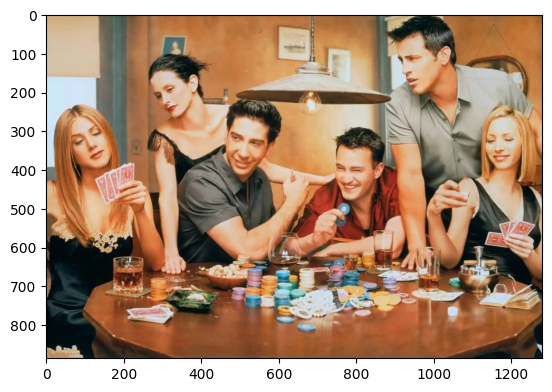

In [3]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [4]:
faces=app.get(img)

D:\Lenditt\Deep_fake_videos\venv\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


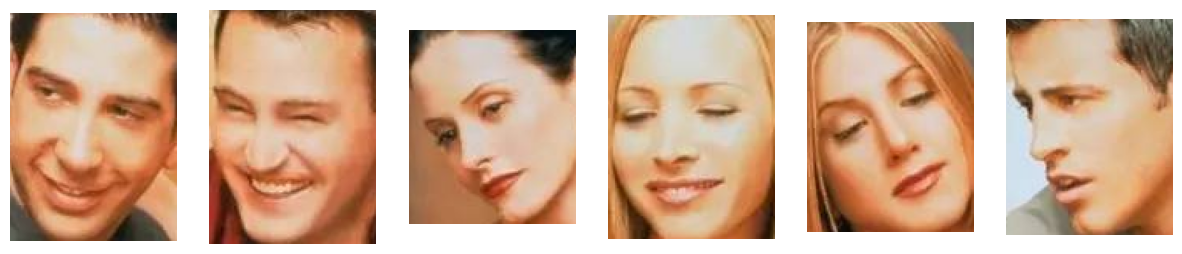

In [6]:
import matplotlib.pyplot as plt
import cv2

# Assuming 'img' is already loaded and 'faces' is a list of dictionaries with bounding boxes
# Example:
# img = cv2.imread('path_to_image.jpg')
# faces = [{'bbox': [x1, y1, x2, y2]}, ...]

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, face in enumerate(faces):
    if i >= 6:  # Ensure we don't go out of bounds if there are more than 6 faces
        break
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    
    # Crop the face from the image
    cropped_face = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    
    # Convert BGR to RGB for displaying using matplotlib
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
    
    # Display the cropped face
    axs[i].imshow(cropped_face_rgb)
    axs[i].axis('off')

plt.show()


In [7]:
# Face Swaping

In [9]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', donwload=False, donwload_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


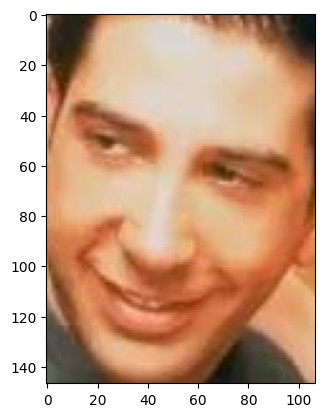

In [12]:
source_face=faces[0]
bbox = source_face['bbox']
bbox = [int(b) for  b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()


In [13]:
res=img.copy()
for face in faces:
    res=swapper.get(res, face, source_face, paste_back=True)

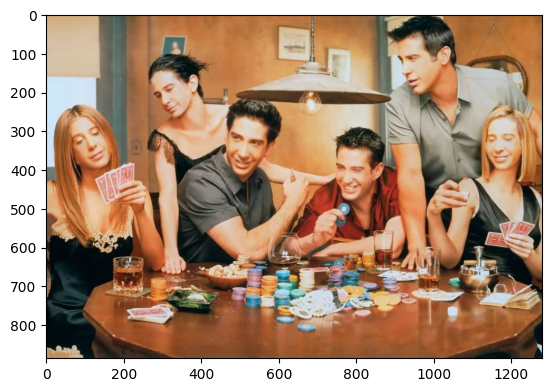

In [14]:
plt.imshow(res[:,:,::-1])
plt.show()

In [18]:
import cv2
import matplotlib.pyplot as plt

def swap_n_show(img1_fn, img2_fn, app, swapper, plot_before=True, plot_after=True):
    """
    Uses face swapper to swap faces in two different images.

    plot_before: if True shows the image before the swap
    plot_after: if True shows image after swap

    return images with swapped faces.

    Assume one face per image
    """
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)
    
    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:, :, ::-1])
        axs[1].axis('off')
        plt.show()

    # Detect faces in both images
    face_1 = app.get(img1)[0]
    face_2 = app.get(img2)[0]

    # Create copies of the images to apply face swap
    img1_ = img1.copy()
    img2_ = img2.copy()

    # Swap faces
    img1_ = swapper.get(img1_, face_1, face_2, paste_back=True)
    img2_ = swapper.get(img2_, face_1, face_2, paste_back=True)

    if plot_after:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:, :, ::-1])
        axs[1].axis('off')
        plt.show()
    
    return img1_, img2_


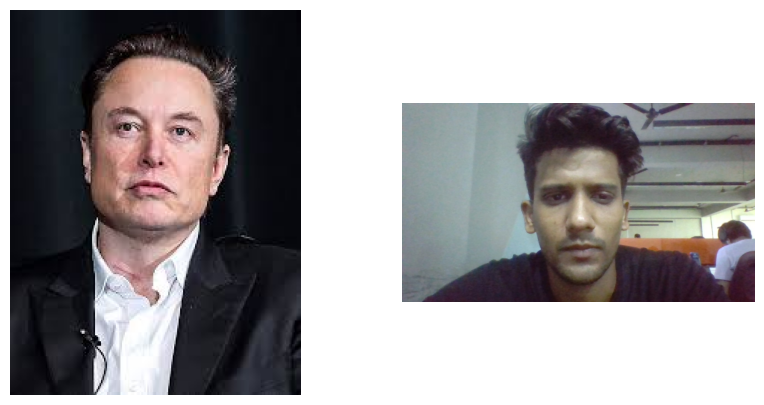

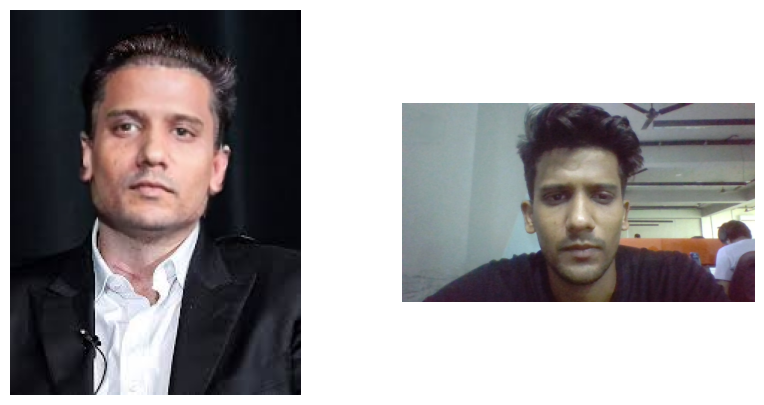

(array([[[19, 12,  9],
         [20, 13, 10],
         [21, 14, 11],
         ...,
         [ 8,  2,  3],
         [ 8,  2,  3],
         [ 8,  2,  3]],
 
        [[19, 12,  9],
         [20, 13, 10],
         [21, 14, 11],
         ...,
         [ 8,  2,  3],
         [ 8,  2,  3],
         [ 8,  2,  3]],
 
        [[19, 12,  9],
         [20, 13, 10],
         [21, 14, 11],
         ...,
         [ 8,  2,  3],
         [ 8,  2,  3],
         [ 8,  2,  3]],
 
        ...,
 
        [[21, 15, 16],
         [21, 15, 16],
         [20, 14, 15],
         ...,
         [10,  2,  2],
         [10,  2,  2],
         [10,  2,  2]],
 
        [[15,  9, 10],
         [16, 10, 11],
         [16, 10, 11],
         ...,
         [ 7,  0,  0],
         [ 6,  0,  1],
         [15,  9, 10]],
 
        [[15,  9, 10],
         [16, 10, 11],
         [16, 10, 11],
         ...,
         [ 7,  0,  0],
         [11,  5,  6],
         [21, 15, 16]]], dtype=uint8),
 array([[[155, 156, 130],
         [154, 1

In [24]:
swap_n_show('Elon_Musk.jpg','Priyanshu.jpg',app, swapper) # Facing some error working on it

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def swap_n_show_1(img1_fn, img2_fn, app, swapper, plot_before=True, plot_after=True):
    """
    Uses face swapper to swap faces in two different images.

    plot_before: if True shows the image before the swap
    plot_after: if True shows image after swap

    return images with swapped faces.

    Assume one face per image
    """
    # Load images
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)
    
    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:, :, ::-1])
        axs[1].axis('off')
        plt.show()

    # Detect faces in both images
    faces_img1 = app.get(img1)
    faces_img2 = app.get(img2)

    if not faces_img1 or not faces_img2:
        raise ValueError("No faces detected in one or both images")

    face_1 = faces_img1[0]
    face_2 = faces_img2[0]

    # Debug prints to check detected faces
    print(f"Face 1: {face_1}")
    print(f"Face 2: {face_2}")

    # Create copies of the images to apply face swap
    img1_ = img1.copy()
    img2_ = img2.copy()

    try:
        # Perform face swapping
        img1_swapped = swapper.get(img1_, face_1, face_2, paste_back=True)
        img2_swapped = swapper.get(img2_, face_1, face_2, paste_back=True)
    except Exception as e:
        print(f"Error during face swapping: {e}")
        img1_swapped = img1
        img2_swapped = img2

    if plot_after:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_swapped[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_swapped[:, :, ::-1])
        axs[1].axis('off')
        plt.show()
    
    return img1_swapped, img2_swapped

# Example usage
# Assuming app and swapper are initialized correctly
# swap_n_show('Priyanshu.jpg', 'Elon_Musk.jpg', app, swapper)


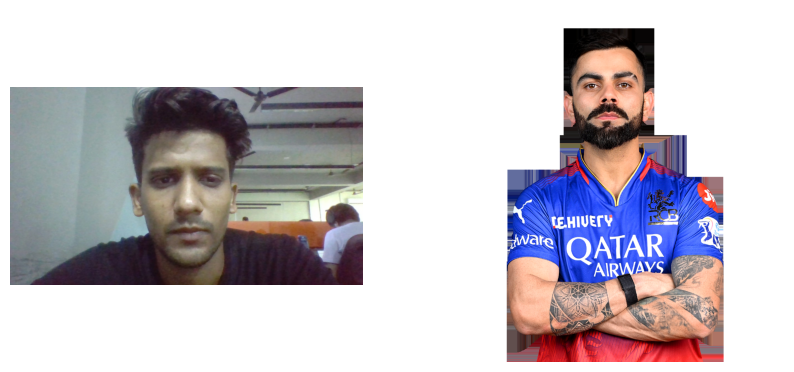

Face 1: {'bbox': array([475.31448, 155.48958, 803.29065, 648.85815], dtype=float32), 'kps': array([[562.40497, 338.67545],
       [725.8279 , 333.9379 ],
       [649.22345, 439.23834],
       [584.53577, 527.9541 ],
       [711.602  , 523.60803]], dtype=float32), 'det_score': 0.8612052, 'landmark_3d_68': array([[ 4.5653391e+02,  3.4238907e+02,  2.5855283e+02],
       [ 4.6675412e+02,  3.9341656e+02,  2.5397931e+02],
       [ 4.7772540e+02,  4.4601697e+02,  2.4510309e+02],
       [ 4.9111948e+02,  4.9614554e+02,  2.2677165e+02],
       [ 5.1133112e+02,  5.4201270e+02,  1.8650137e+02],
       [ 5.3659735e+02,  5.7698016e+02,  1.5105421e+02],
       [ 5.6310394e+02,  6.0602997e+02,  1.2005643e+02],
       [ 5.9727374e+02,  6.3088995e+02,  8.2809578e+01],
       [ 6.5403491e+02,  6.4698785e+02,  6.9998459e+01],
       [ 7.0830621e+02,  6.2965155e+02,  9.1483566e+01],
       [ 7.3868152e+02,  5.9636371e+02,  1.3580518e+02],
       [ 7.6197607e+02,  5.5921851e+02,  1.7805569e+02],
       [ 7

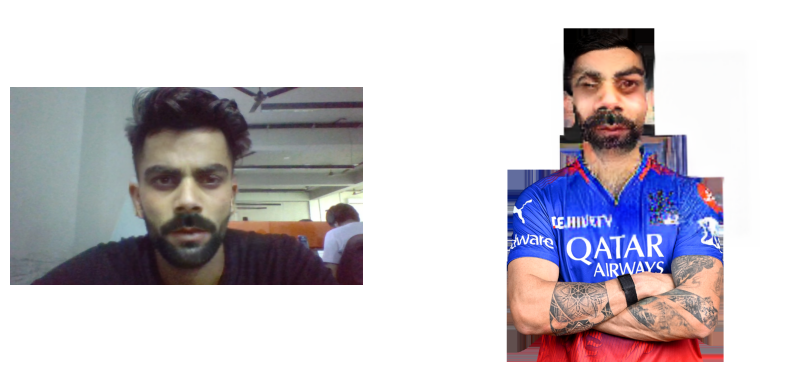

(array([[[155, 156, 130],
         [154, 155, 129],
         [153, 153, 129],
         ...,
         [119, 113, 118],
         [117, 111, 116],
         [116, 110, 115]],
 
        [[154, 154, 130],
         [153, 153, 129],
         [153, 153, 129],
         ...,
         [120, 114, 119],
         [118, 112, 117],
         [117, 111, 116]],
 
        [[154, 153, 132],
         [153, 152, 131],
         [152, 151, 130],
         ...,
         [122, 116, 121],
         [120, 114, 119],
         [120, 114, 119]],
 
        ...,
 
        [[119, 113, 100],
         [121, 115, 102],
         [122, 116, 105],
         ...,
         [ 53,  28,  72],
         [ 55,  27,  73],
         [ 54,  26,  72]],
 
        [[119, 116, 102],
         [119, 116, 102],
         [120, 117, 103],
         ...,
         [ 50,  24,  70],
         [ 50,  22,  68],
         [ 49,  21,  67]],
 
        [[119, 116, 102],
         [120, 117, 103],
         [120, 117, 103],
         ...,
         [ 47,  21,  67],
  

In [36]:
swap_n_show('Priyanshu.jpg','Virat Kohli.png',app, swapper)# Facing some error working on it